In [1]:
import sys

sys.path.append("../")
from RAICAT.utils import (
    compute_ipv6_percentage,
    convert_three_letter_to_two_letter_code,
    compute_date_range,
)
import pydash as pyd 

In [11]:
help(compute_ipv6_percentage)
# documentation of compute_ipv6_percentage

Help on function compute_ipv6_percentage in module RAICAT.utils:

compute_ipv6_percentage(country_code: str, start_date: str, finish_date: str) -> List[Dict[str, Union[float, str]]]
    Computes the percentage of IPv6 addresses for a given country and date range.
    
    Args:
        country_code (str): The country code for which to compute the percentage.
        start_date (str): The start date of the date range.
        finish_date (str): The end date of the date range.
    
    Returns:
        List[Dict[str, Union[str, float]]]: A list of dictionaries containing the name of the date and the percentage of IPv6 addresses.



In [9]:


selected_countries = ["FRA", "IRL", "ITA", "CAN", "ISR"]
# select for which countries you want to compute the data
start_date, end_date = "2021-01-01", "2021-01-02"
# select time range for which you want to compute the data
date_range = compute_date_range(start_date, end_date)
# generate date range for which you want to compute the data
result_placeholder = [
    {"name": date, **{country: 0 for country in selected_countries}}
    for date in date_range
]
# create placeholder for the result
countries_data = result_placeholder
for country in selected_countries:
    for computed_result in compute_ipv6_percentage(
        convert_three_letter_to_two_letter_code(country),
        start_date,
        end_date,
    ):
        relevant_item = pyd.find(
            countries_data, lambda item: item["name"] == computed_result["name"]
        )
        relevant_item[country] = computed_result["ip_v6"]

serialized_value = f"ipv6_countries_data={countries_data}"

In [10]:
%store  serialized_value >ipv_6_dump_file.py
# this is jupiter notebook magic, it will save the variable to a file

import pathlib
pathlib.Path("ipv_6_dump_file2.py").write_text(serialized_value)
# this is classic way to dump a variable to a file as a text

Writing 'serialized_value' (str) to file 'ipv_6_dump_file.py'.


228

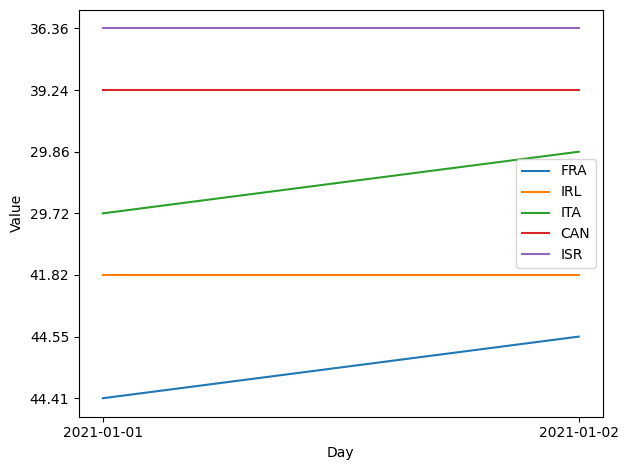

In [7]:
import matplotlib.pyplot as plt
def plot_graph(data, countries):
    # Get a sorted list of all unique countries in the data
    # countries = sorted(list(set().union(*data)))
    dates = [day["name"] for day in data]
    # Create a line graph for each country

    for country in countries:
        # Get the values for this country at each day
        values = [day.get(country, None) for day in data]

        # Plot the data
        plt.plot(dates, values, label=country)

    # Add labels and a legend
    plt.xlabel("Day")
    plt.ylabel("Value")
    plt.legend()

    # plt.xticks(ticks=range(0, len(data), 3), rotation=45, fontsize=6)
    # ! uncoomment in case if x-axis is too crowded
    plt.tight_layout()
    # Display the plot
    plt.show()


plot_graph(countries_data, selected_countries)